In [1]:
import pandas as pd
import sys
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
sns.set(style="ticks")
%matplotlib inline

import seaborn as sns
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

sns.set_context('poster')
# import matplotlib.pylab as pylab
# params = {'legend.fontsize': 'large',
#           'figure.figsize': (15, 5),
#          'axes.labelsize': 'large',
#          'axes.titlesize':'large',
#          'xtick.labelsize':'large',
#          'ytick.labelsize':'large'}
# pylab.rcParams.update(params)}

In [2]:
data = pd.read_csv("HK/top3_dist.csv")

In [33]:
data = data.drop('Unnamed: 0', axis = 1)
data.head(2)

,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,cen_lat,cen_long,distance
0,69074,160139,CENTRAL & WESTERN,22.28352,114.15018,Entire home/apt,1408,3,130,1,159,22.28419,114.146482,0.387495
1,103760,304876,CENTRAL & WESTERN,22.28407,114.15570,Entire home/apt,853,2,260,12,329,22.28419,114.146482,0.947967


In [34]:
set(data.neighbourhood)

{'CENTRAL & WESTERN', 'WAN CHAI', 'YAU TSIM MONG'}

In [35]:
set(data.room_type)

{'Entire home/apt', 'Private room', 'Shared room'}

In [36]:
data[(data.neighbourhood == 'CENTRAL & WESTERN')&(data.room_type!='Entire home/apt')].shape

(734, 14)

In [37]:
data_c_en = data[(data.neighbourhood == 'CENTRAL & WESTERN')&(data.room_type=='Entire home/apt')]
data_c_ro = data[(data.neighbourhood == 'CENTRAL & WESTERN')&(data.room_type!='Entire home/apt')]

In [38]:
data_w_en = data[(data.neighbourhood == 'WAN CHAI')&(data.room_type=='Entire home/apt')]
data_w_ro = data[(data.neighbourhood == 'WAN CHAI')&(data.room_type!='Entire home/apt')]

In [39]:
data_y_en = data[(data.neighbourhood == 'YAU TSIM MONG')&(data.room_type=='Entire home/apt')]
data_y_ro = data[(data.neighbourhood == 'YAU TSIM MONG')&(data.room_type!='Entire home/apt')]

In [49]:
data_c_en.columns

Index(['id', 'host_id', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365', 'cen_lat', 'cen_long', 'distance'], dtype='object')

In [105]:
x = data_c_en[['distance']]
y = data_c_en.price.values
model = LinearRegression()
result = model.fit(x,y)

y_pred = model.predict(x)

print('Coefficients: \n', model.coef_[0], model.intercept_)

Coefficients: 
 265.1459302911186 783.684250337534


Text(0.5, 1.0, 'The Scatter plot of relationship between price and diatance to centre')

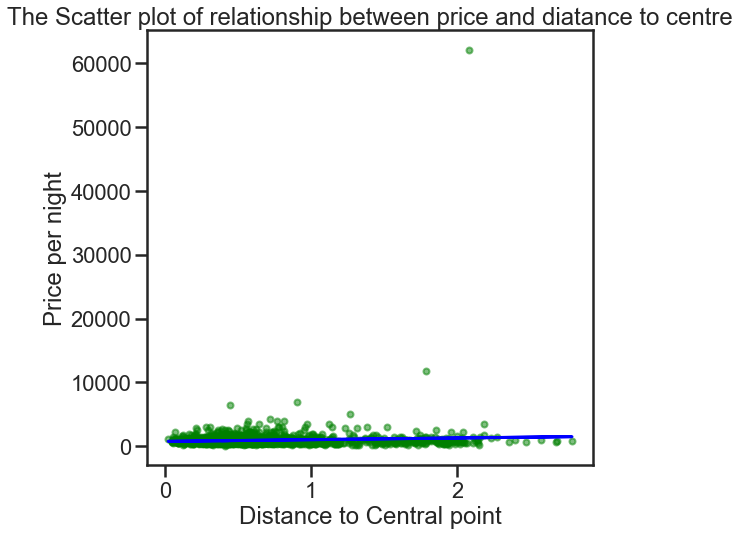

In [106]:
# Plot outputs
plt.figure(figsize=(8,8))
plt.scatter(data_c_en.distance, data_c_en.price, marker = '.', color = 'green', alpha = 0.5)
plt.plot(x, y_pred, color = 'blue')
plt.gca().set_xlabel('Distance to Central point')
plt.gca().set_ylabel('Price per night')
plt.title('The Scatter plot of relationship between price and diatance to centre')

In [108]:
x = data_c_ro[['distance']]
y = data_c_ro.price.values
model = LinearRegression()
result = model.fit(x,y)

y_pred = model.predict(x)

print('Coefficients: \n', model.coef_[0], model.intercept_)

Coefficients: 
 21.584015874656295 492.00841659654105


Text(0.5, 1.0, 'The Scatter plot of relationship between price and diatance to centre')

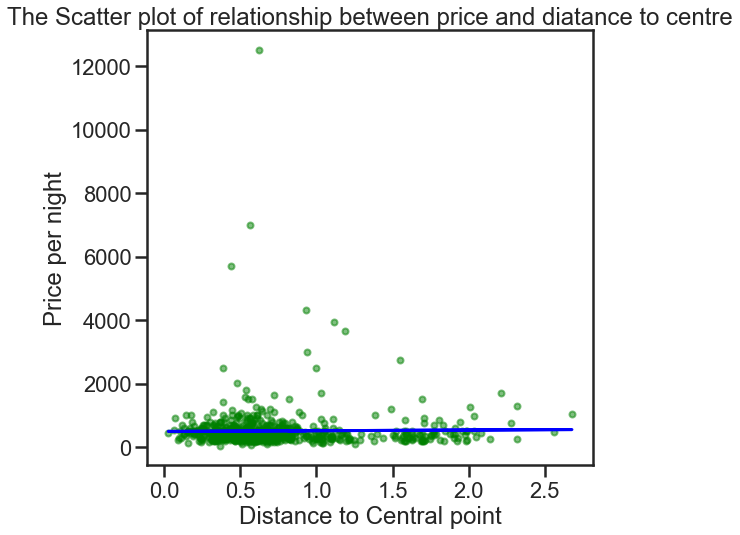

In [110]:
# Plot outputs
plt.figure(figsize=(8,8))
plt.scatter(x, y, marker = '.', color = 'green', alpha = 0.5)
plt.plot(x, y_pred, color = 'blue')
plt.gca().set_xlabel('Distance to Central point')
plt.gca().set_ylabel('Price per night')
plt.title('The Scatter plot of relationship between price and diatance to centre')

In [111]:
x = data_w_en[['distance']]
y = data_w_en.price.values
model = LinearRegression()
result = model.fit(x,y)

y_pred = model.predict(x)

print('Coefficients: \n', model.coef_[0], model.intercept_)

Coefficients: 
 -10.555929034421757 974.8699854216918


Text(0.5, 1.0, 'The Scatter plot of relationship between price and diatance to centre')

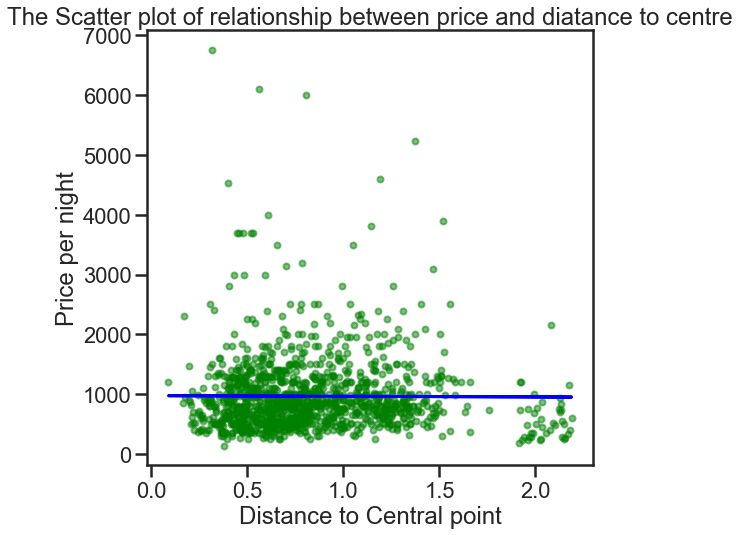

In [112]:
# Plot outputs
plt.figure(figsize=(8,8))
plt.scatter(x, y, marker = '.', color = 'green', alpha = 0.5)
plt.plot(x, y_pred, color = 'blue')
plt.gca().set_xlabel('Distance to Central point')
plt.gca().set_ylabel('Price per night')
plt.title('The Scatter plot of relationship between price and diatance to centre')

In [114]:
x = data_w_ro[['distance']]
y = data_w_ro.price.values
model = LinearRegression()
result = model.fit(x,y)

y_pred = model.predict(x)

print('Coefficients: \n', model.coef_[0], model.intercept_)

Coefficients: 
 -383.26784654702243 1085.3878924317755


Text(0.5, 1.0, 'The Scatter plot of relationship between price and diatance to centre')

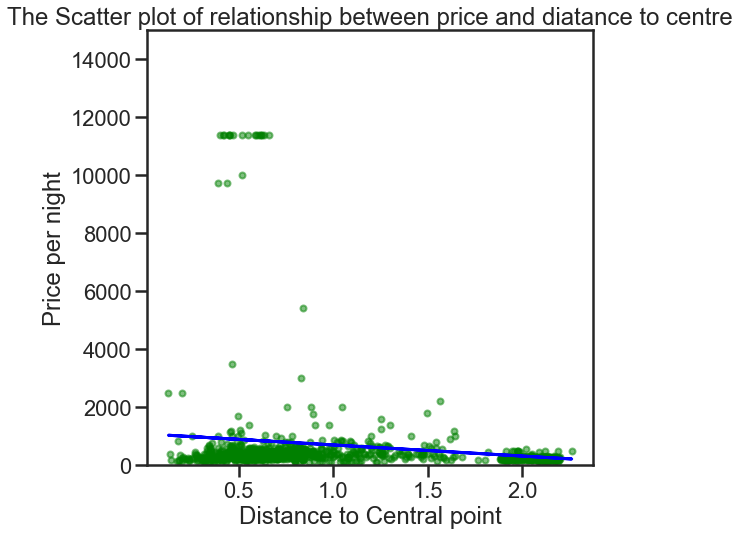

In [116]:
# Plot outputs
plt.figure(figsize=(8,8))
plt.scatter(x, y, marker = '.', color = 'green', alpha = 0.5)
plt.plot(x, y_pred, color = 'blue')
plt.ylim(0,15000)
plt.gca().set_xlabel('Distance to Central point')
plt.gca().set_ylabel('Price per night')
plt.title('The Scatter plot of relationship between price and diatance to centre')

In [117]:
x = data_y_en[['distance']]
y = data_y_en.price.values
model = LinearRegression()
result = model.fit(x,y)

y_pred = model.predict(x)

print('Coefficients: \n', model.coef_[0], model.intercept_)

Coefficients: 
 287.7613007365095 766.3997694817126


Text(0.5, 1.0, 'The Scatter plot of relationship between price and diatance to centre')

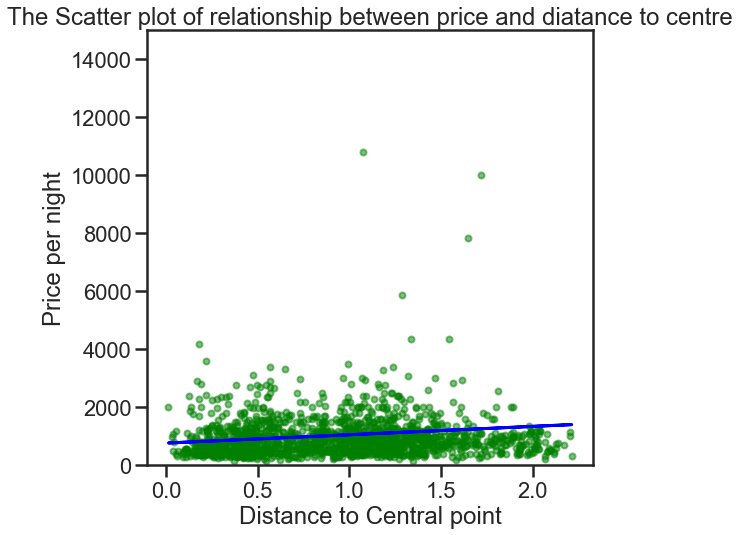

In [118]:
# Plot outputs
plt.figure(figsize=(8,8))
plt.scatter(x, y, marker = '.', color = 'green', alpha = 0.5)
plt.plot(x, y_pred, color = 'blue')
plt.ylim(0,15000)
plt.gca().set_xlabel('Distance to Central point')
plt.gca().set_ylabel('Price per night')
plt.title('The Scatter plot of relationship between price and diatance to centre')

In [119]:
x = data_y_ro[['distance']]
y = data_y_ro.price.values
model = LinearRegression()
result = model.fit(x,y)

y_pred = model.predict(x)

print('Coefficients: \n', model.coef_[0], model.intercept_)

Coefficients: 
 -8.378549539243112 631.7727479189629


Text(0.5, 1.0, 'The Scatter plot of relationship between price and diatance to centre')

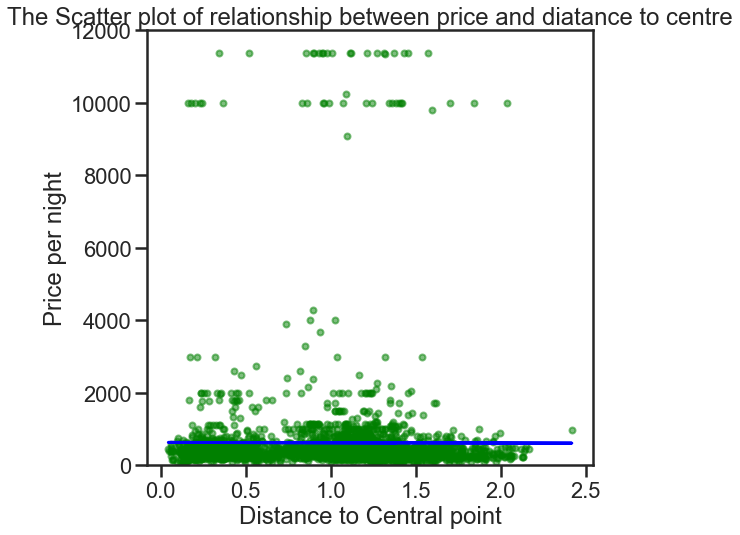

In [122]:
# Plot outputs
plt.figure(figsize=(8,8))
plt.scatter(x, y, marker = '.', color = 'green', alpha = 0.5)
plt.plot(x, y_pred, color = 'blue')
plt.ylim(0,12000)
plt.gca().set_xlabel('Distance to Central point')
plt.gca().set_ylabel('Price per night')
plt.title('The Scatter plot of relationship between price and diatance to centre')